In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
from astropy.table import Table

# Define the filename
file_path1 = '/content/drive/MyDrive/galactic project/Chris and Punya Project/table_1_catwise.fits'

print("Reading FITS file... (this may take a moment)")
# Read the FITS file using astropy
# 'memmap=True' helps avoid loading the entire file into RAM at once during the read step
astro_table1 = Table.read(file_path1, format='fits', memmap=True)

# Convert to a pandas DataFrame for easier analysis
df1 = astro_table1.to_pandas()

print(df1.columns.tolist())
print(f"\nSuccessfully loaded {len(df1)} stars.")


Reading FITS file... (this may take a moment)
['source_id', 'catwise_w1', 'catwise_w2', 'in_training_sample', 'mh_xgboost', 'teff_xgboost', 'logg_xgboost']

Successfully loaded 174922161 stars.


In [17]:
# Define the filename
file_path = '/content/drive/MyDrive/galactic project/Chris and Punya Project/table_2_catwise.fits'

print("Reading FITS file... (this may take a moment)")
# Read the FITS file using astropy
# 'memmap=True' helps avoid loading the entire file into RAM at once during the read step
astro_table = Table.read(file_path, format='fits', memmap=True)

# Convert to a pandas DataFrame for easier analysis
df = astro_table.to_pandas()

print(df.columns.tolist())
print(f"\nSuccessfully loaded {len(df)} stars.")

Reading FITS file... (this may take a moment)
['source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ruwe', 'radial_velocity', 'radial_velocity_error', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'catwise_w1', 'catwise_w2', 'mh_xgboost', 'teff_xgboost', 'logg_xgboost', 'in_training_sample']

Successfully loaded 17558141 stars.


In [18]:
# 1. Check the Metallicity & Parameters (For Age-Metallicity Relation)
print("\n--- Stellar Parameters ---")
print(df[['mh_xgboost', 'teff_xgboost', 'logg_xgboost']].head())

# 2. Check the Kinematics (For Disk Dynamics)
# Note: 'radial_velocity' is included in this Table 2 file
#print("\n--- Kinematics & Astrometry ---")
#cols_kinematics = ['radial_velocity', 'pmra', 'pmdec', 'parallax', 'ruwe']
#print(df[cols_kinematics].head())


--- Stellar Parameters ---
   mh_xgboost  teff_xgboost  logg_xgboost
0      -0.144        5065.8         2.993
1      -0.083        5017.9         3.446
2      -0.401        4499.0         1.916
3       0.114        4938.3         3.203
4      -0.478        4980.2         3.319


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


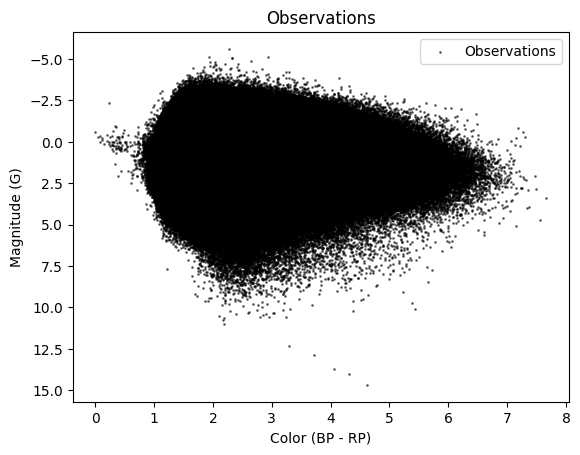

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# 1. Calculate Distance in parsecs (Distance = 1000 / parallax_in_mas)
# Note: It's good practice to filter out negative/zero parallaxes first
df = df[df['parallax'] > 0].copy()
df['distance_pc'] = 1000.0 / df['parallax']

# 2. Calculate Absolute Magnitude (M_G = G - 5 * log10(d) + 5)
# This allows you to plot your data directly on top of the CMD isochrones
df['M_G'] = df['phot_g_mean_mag'] - 5 * np.log10(df['distance_pc']) + 5

# Now you can plot Color (BP-RP) vs Absolute Magnitude (M_G)
df['bp_rp'] = df['phot_bp_mean_mag'] - df['phot_rp_mean_mag']

plt.scatter(df['bp_rp'], df['M_G'],
            s=1, color='black', alpha=0.5, label='Observations')
plt.gca().invert_yaxis()  # Magnitudes are reverse (brighter is lower number)
plt.xlabel('Color (BP - RP)')
plt.ylabel('Magnitude (G)')
plt.legend()
plt.title('Observations')
plt.show()

In [45]:
# Define the filename of your isochrone file
isochrone_file = '/content/drive/MyDrive/galactic project/Chris and Punya Project/isochrone-0.5to0.dat'

# 1. Read the file
# The PARSEC files usually have comments starting with '#'
# The actual data columns are space-separated
#print(f"Reading isochrone file: {isochrone_file}...")

# Note: Sometimes the header row is commented out. We might need to manually inspect or skip rows.
# Typically, the last commented line contains the column names.
iso_df = pd.read_csv(isochrone_file, delim_whitespace=True, comment='#', header=None)
print(iso_df.columns.tolist())
print(f"\nSuccessfully loaded {len(df1)} stars.")


/tmp/ipython-input-3072731327.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  iso_df = pd.read_csv(isochrone_file, delim_whitespace=True, comment='#', header=None)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

Successfully loaded 174922161 stars.


In [49]:
# 2. Define Column Names (Standard for CMD 3.7/3.9 output)
# Based on the CMD form, these are the typical columns.
# IF this fails, we will need to read the header line from the file directly.
# Zini = Initial Metallicity, logAge = log10(Age), mini = Mass
# Gmag, G_BPmag, G_RPmag = Absolute magnitudes in Gaia bands

columns = ['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2', 'period3', 'period4', 'pmode',
           'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag', 'Gmag', 'G_BPbrmag', 'G_BPftmag', 'G_RPmag', 'B_Tmag', 'V_Tmag', 'Jmag', 'Hmag', 'Ksmag']

# Adjust column list length if needed based on the actual file width
if len(iso_df.columns) == len(columns):
    iso_df.columns = columns
else:
    print(f"Warning: Column count mismatch. File has {len(iso_df.columns)} columns, expected {len(columns)}.")
    # Fallback: Just print the first few rows to inspect
print(iso_df.head())

       Zini   MH  logAge      Mini   int_IMF   Mass   logL   logTe   logg  \
0  0.004831 -0.5     8.0  0.090000  1.081690  0.090 -2.689  3.4500  4.834   
1  0.004831 -0.5     8.0  0.094809  1.126217  0.095 -2.652  3.4549  4.838   
2  0.004831 -0.5     8.0  0.100000  1.171106  0.100 -2.612  3.4603  4.843   
3  0.004831 -0.5     8.0  0.103841  1.202411  0.104 -2.585  3.4635  4.846   
4  0.004831 -0.5     8.0  0.113802  1.277040  0.114 -2.518  3.4719  4.852   

   label  ...  mbolmag    Gmag  G_BPbrmag  G_BPftmag  G_RPmag  B_Tmag  V_Tmag  \
0      0  ...   11.493  12.882     15.124     15.151   11.519  17.174  15.112   
1      0  ...   11.400  12.740     14.895     14.923   11.392  16.918  14.884   
2      0  ...   11.299  12.585     14.646     14.674   11.254  16.640  14.635   
3      0  ...   11.234  12.489     14.501     14.530   11.169  16.477  14.489   
4      0  ...   11.066  12.243     14.125     14.155   10.950  16.055  14.113   

    Jmag   Hmag  Ksmag  
0  9.412  8.904  8.644  


In [50]:
# 3. Filter/Inspect the Data
# Let's see the unique Ages and Metallicities in this file
unique_ages = iso_df['logAge'].unique()
unique_metallicities = iso_df['MH'].unique()

print("\n--- Isochrone Summary ---")
print(f"Unique log(Ages): {unique_ages}")
print(f"Unique Metallicities [M/H]: {unique_metallicities}")
print(iso_df[['logAge', 'MH', 'Gmag', 'G_BPbrmag', 'G_BPftmag', 'G_RPmag']].head())


--- Isochrone Summary ---
Unique log(Ages): [ 8.       8.77815  9.04139  9.20412  9.32222  9.41497  9.49136  9.5563
  9.61278  9.66276  9.70757  9.74819  9.78533  9.81954  9.85126  9.88081
  9.90848  9.9345   9.95904  9.98227 10.00432 10.02531 10.04532 10.06446
 10.08279 10.10037]
Unique Metallicities [M/H]: [-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]
   logAge   MH    Gmag  G_BPbrmag  G_BPftmag  G_RPmag
0     8.0 -0.5  12.882     15.124     15.151   11.519
1     8.0 -0.5  12.740     14.895     14.923   11.392
2     8.0 -0.5  12.585     14.646     14.674   11.254
3     8.0 -0.5  12.489     14.501     14.530   11.169
4     8.0 -0.5  12.243     14.125     14.155   10.950


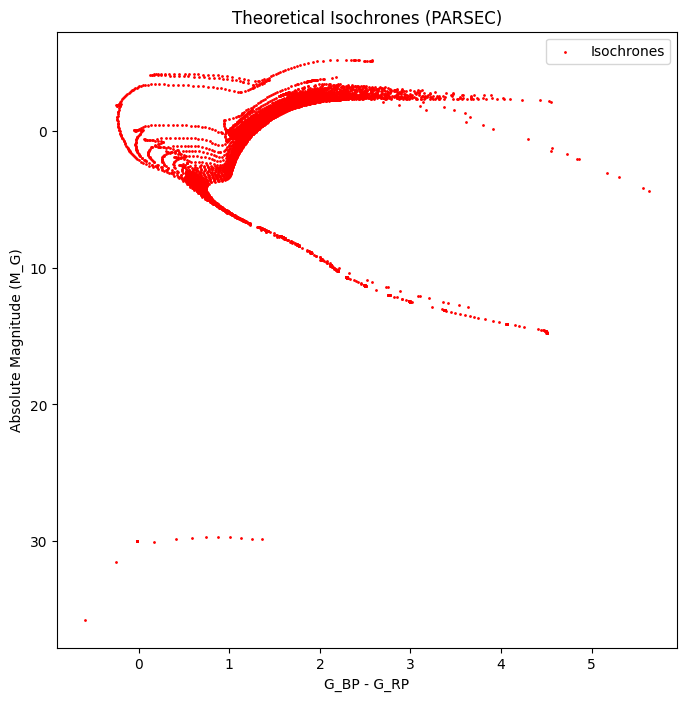

In [51]:
# 4. Quick Plot (Isochrones vs. Your Data)
# Create Color and Magnitude columns for plotting
# If Gmag is brighter (less) than 10.87, use 'br'. Otherwise, use 'ft'.
iso_df['BP_actual'] = np.where(
    iso_df['Gmag'] < 10.87,
    iso_df['G_BPbrmag'],
    iso_df['G_BPftmag'])
iso_df['BP_RP'] = iso_df['BP_actual'] - iso_df['G_RPmag']
iso_df['M_G'] = iso_df['Gmag']

plt.figure(figsize=(8, 8))
# Plot the isochrones (e.g., for one metallicity)
subset = iso_df[iso_df['MH'] == unique_metallicities[0]] # Plot first metallicity found
plt.scatter(subset['BP_RP'], subset['M_G'], s=1, label='Isochrones', color='red')

plt.gca().invert_yaxis() # Magnitudes go backwards
plt.xlabel('G_BP - G_RP')
plt.ylabel('Absolute Magnitude (M_G)')
plt.title('Theoretical Isochrones (PARSEC)')
plt.legend()
plt.show()

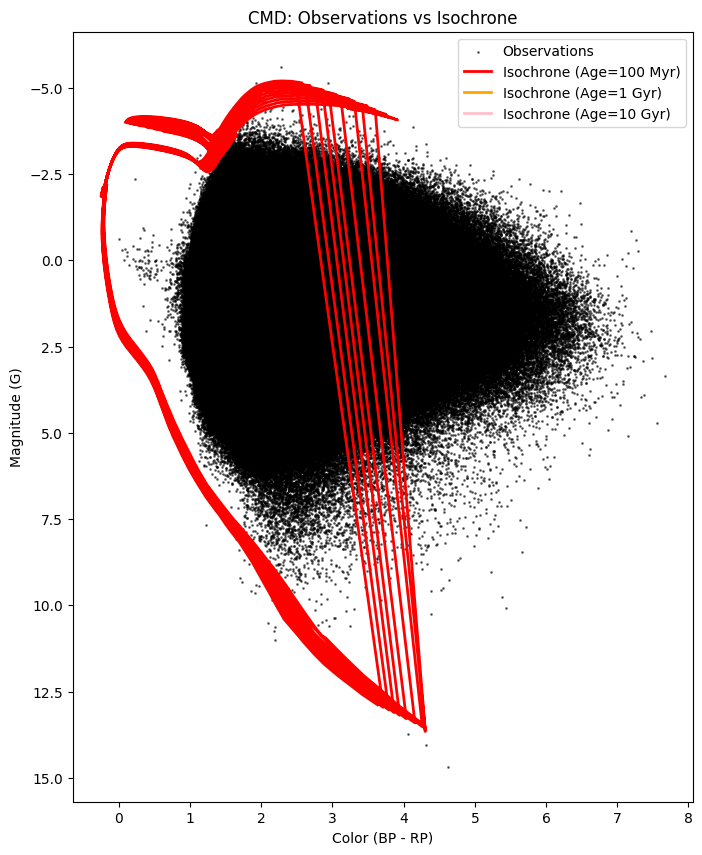

In [54]:
plt.figure(figsize=(8, 10))

# --- Plot Observations (The Data) ---
plt.scatter(df['bp_rp'], df['M_G'],
            s=1, color='black', alpha=0.5, label='Observations')

# --- Plot Isochrone (The Model) ---
# You often have many ages in one file. Filter for the specific age you want.
# Example: Select logAge = 8.0 (100 Million years)
one_iso8 = iso_df[iso_df['logAge'] == 8.0]

plt.plot(one_iso8['BP_RP'], one_iso8['M_G'],
         color='red', linewidth=2, label='Isochrone (Age=100 Myr)')
# Example: Select logAge = 9.0 (1 Billion years)
one_iso9 = iso_df[iso_df['logAge'] == 9.0]

plt.plot(one_iso9['BP_RP'], one_iso9['M_G'],
         color='orange', linewidth=2, label='Isochrone (Age=1 Gyr)')
# Example: Select logAge = 10.0 (10 Billion years)
one_iso10 = iso_df[iso_df['logAge'] == 10.0]

plt.plot(one_iso10['BP_RP'], one_iso10['M_G'],
         color='pink', linewidth=2, label='Isochrone (Age=10 Gyr)')

# --- Formatting the Graph ---
plt.gca().invert_yaxis()  # Magnitudes are reverse (brighter is lower number)
plt.xlabel('Color (BP - RP)')
plt.ylabel('Magnitude (G)')
plt.legend()
plt.title('CMD: Observations vs Isochrone')

plt.show()